In [1]:
import lightgbm
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
df_ecg_all = pd.read_csv("VREED_Dataset/05 ECG-GSR Data/02 ECG-GSR (Features Extracted)/ECG_FeaturesExtracted.csv")
df_ecg_all.head()

,Quad_Cat,Mean,Min,Max,MeanRR,MedianRR,MinRR,MaxRR,LF,HF,VLF,Ibi,Bpm,Sdnn,Sdsd,Rmssd,Pnn50,pnn20,Pnn50pnn20
0,1,9.404760e-07,-0.741816,0.919643,1531,1562.0,14,3130,1.194750e-09,2.231830e-06,4.403520e-11,763.823158,78.559522,245.875789,469.052909,102253.7461,0.478903,0.481013,0.995614
1,0,4.330640e-07,-0.386809,0.452853,1582,1599.0,1336,1695,1.060430e-10,1.283180e-07,2.946190e-12,794.173554,75.573801,240.813984,468.780827,127309.4367,0.477178,0.477178,1.000000
2,0,9.034100e-06,-0.311829,0.398468,1637,1659.5,1421,1798,2.679310e-09,6.225430e-08,8.177790e-10,781.661290,76.868796,263.073272,492.561472,130746.3059,0.459459,0.459459,1.000000
3,3,-1.607510e-05,-0.330817,0.405026,1724,1727.0,1574,1895,1.345210e-08,1.348180e-07,4.147950e-09,720.920000,83.241534,243.280744,419.797884,163218.7363,0.424749,0.438127,0.969466
4,1,3.100000e-06,-0.303375,0.390093,1634,1654.0,1354,1837,7.953400e-10,1.135080e-07,2.688100e-10,779.417204,77.044532,266.303744,502.914461,121215.4100,0.480603,0.487069,0.986726


In [3]:
#Normalize data using MinMaxScaler
scaler = preprocessing.MinMaxScaler()
df_ecg_drop = df_ecg_all.drop(['Quad_Cat'], axis=1)
names = df_ecg_drop.columns
fit = scaler.fit_transform(df_ecg_drop)
scaled_df = pd.DataFrame(fit, columns=names)

In [4]:
scaled_df

,Mean,Min,Max,MeanRR,MedianRR,MinRR,MaxRR,LF,HF,VLF,Ibi,Bpm,Sdnn,Sdsd,Rmssd,Pnn50,pnn20,Pnn50pnn20
0,0.620218,0.247688,0.723824,0.024380,0.022320,0.003690,0.018784,0.000358,0.073382,0.000016,0.236841,0.604383,0.620706,0.870455,0.435817,0.687615,0.601416,0.991855
1,0.619265,0.712832,0.299935,0.027428,0.024254,0.613469,0.003607,0.000009,0.004205,0.000000,0.282384,0.546729,0.605248,0.869882,0.546639,0.684441,0.592299,1.000000
2,0.635420,0.811074,0.250549,0.030714,0.027416,0.652675,0.004696,0.000834,0.002032,0.000316,0.263608,0.571735,0.673227,0.920031,0.561840,0.651832,0.550169,1.000000
3,0.588257,0.786194,0.256505,0.035913,0.030945,0.723247,0.005722,0.004286,0.004418,0.001608,0.172463,0.694793,0.612781,0.766585,0.705466,0.587955,0.499448,0.943293
4,0.624274,0.822150,0.242944,0.030535,0.027129,0.621771,0.005108,0.000230,0.003718,0.000103,0.260241,0.575129,0.683093,0.941863,0.519685,0.690744,0.615816,0.975348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,0.628281,0.791413,0.094741,0.462982,0.072239,0.754151,0.633721,0.000895,0.001449,0.000178,0.184827,0.676852,0.499249,0.542272,0.651343,0.626166,0.669424,0.766397
308,0.691427,0.777482,0.131714,0.048939,0.048821,0.033210,0.039185,0.032671,0.009497,0.012896,0.211157,0.640930,0.534037,0.658210,0.554501,0.939139,0.939291,0.977535
309,0.668528,0.789992,0.132297,0.021094,0.010846,0.023524,0.021650,0.016022,0.005076,0.006629,0.193857,0.663990,0.460736,0.538035,0.491848,0.784623,0.794122,0.899405
310,0.812129,0.802167,0.120148,0.037944,0.043019,0.385148,0.023860,0.111845,0.033263,0.041298,0.186640,0.676580,0.444202,0.536770,0.428582,0.873665,0.848664,0.984127


In [5]:
df_ecg = pd.concat([df_ecg_all['Quad_Cat'],scaled_df], axis = 1)
df_ecg

,Quad_Cat,Mean,Min,Max,MeanRR,MedianRR,MinRR,MaxRR,LF,HF,VLF,Ibi,Bpm,Sdnn,Sdsd,Rmssd,Pnn50,pnn20,Pnn50pnn20
0,1,0.620218,0.247688,0.723824,0.024380,0.022320,0.003690,0.018784,0.000358,0.073382,0.000016,0.236841,0.604383,0.620706,0.870455,0.435817,0.687615,0.601416,0.991855
1,0,0.619265,0.712832,0.299935,0.027428,0.024254,0.613469,0.003607,0.000009,0.004205,0.000000,0.282384,0.546729,0.605248,0.869882,0.546639,0.684441,0.592299,1.000000
2,0,0.635420,0.811074,0.250549,0.030714,0.027416,0.652675,0.004696,0.000834,0.002032,0.000316,0.263608,0.571735,0.673227,0.920031,0.561840,0.651832,0.550169,1.000000
3,3,0.588257,0.786194,0.256505,0.035913,0.030945,0.723247,0.005722,0.004286,0.004418,0.001608,0.172463,0.694793,0.612781,0.766585,0.705466,0.587955,0.499448,0.943293
4,1,0.624274,0.822150,0.242944,0.030535,0.027129,0.621771,0.005108,0.000230,0.003718,0.000103,0.260241,0.575129,0.683093,0.941863,0.519685,0.690744,0.615816,0.975348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2,0.628281,0.791413,0.094741,0.462982,0.072239,0.754151,0.633721,0.000895,0.001449,0.000178,0.184827,0.676852,0.499249,0.542272,0.651343,0.626166,0.669424,0.766397
308,0,0.691427,0.777482,0.131714,0.048939,0.048821,0.033210,0.039185,0.032671,0.009497,0.012896,0.211157,0.640930,0.534037,0.658210,0.554501,0.939139,0.939291,0.977535
309,1,0.668528,0.789992,0.132297,0.021094,0.010846,0.023524,0.021650,0.016022,0.005076,0.006629,0.193857,0.663990,0.460736,0.538035,0.491848,0.784623,0.794122,0.899405
310,3,0.812129,0.802167,0.120148,0.037944,0.043019,0.385148,0.023860,0.111845,0.033263,0.041298,0.186640,0.676580,0.444202,0.536770,0.428582,0.873665,0.848664,0.984127


In [6]:
#Read column names for X and y
df_ecg['Arousal'] = df_ecg['Quad_Cat'].apply(lambda x: 0 if ((x == 1) | (x == 2))  else 1)
df_ecg['Valence'] = df_ecg['Quad_Cat'].apply(lambda x: 0 if ((x == 2) | (x == 3))  else 1)

column_names = scaled_df.columns

X_ecg = df_ecg[column_names]
y_ecg_quad = df_ecg['Quad_Cat']
y_ecg_ar = df_ecg['Arousal']
y_ecg_va = df_ecg['Valence']
df_ecg

,Quad_Cat,Mean,Min,Max,MeanRR,MedianRR,MinRR,MaxRR,LF,HF,...,Ibi,Bpm,Sdnn,Sdsd,Rmssd,Pnn50,pnn20,Pnn50pnn20,Arousal,Valence
0,1,0.620218,0.247688,0.723824,0.024380,0.022320,0.003690,0.018784,0.000358,0.073382,...,0.236841,0.604383,0.620706,0.870455,0.435817,0.687615,0.601416,0.991855,0,1
1,0,0.619265,0.712832,0.299935,0.027428,0.024254,0.613469,0.003607,0.000009,0.004205,...,0.282384,0.546729,0.605248,0.869882,0.546639,0.684441,0.592299,1.000000,1,1
2,0,0.635420,0.811074,0.250549,0.030714,0.027416,0.652675,0.004696,0.000834,0.002032,...,0.263608,0.571735,0.673227,0.920031,0.561840,0.651832,0.550169,1.000000,1,1
3,3,0.588257,0.786194,0.256505,0.035913,0.030945,0.723247,0.005722,0.004286,0.004418,...,0.172463,0.694793,0.612781,0.766585,0.705466,0.587955,0.499448,0.943293,1,0
4,1,0.624274,0.822150,0.242944,0.030535,0.027129,0.621771,0.005108,0.000230,0.003718,...,0.260241,0.575129,0.683093,0.941863,0.519685,0.690744,0.615816,0.975348,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2,0.628281,0.791413,0.094741,0.462982,0.072239,0.754151,0.633721,0.000895,0.001449,...,0.184827,0.676852,0.499249,0.542272,0.651343,0.626166,0.669424,0.766397,0,0
308,0,0.691427,0.777482,0.131714,0.048939,0.048821,0.033210,0.039185,0.032671,0.009497,...,0.211157,0.640930,0.534037,0.658210,0.554501,0.939139,0.939291,0.977535,1,1
309,1,0.668528,0.789992,0.132297,0.021094,0.010846,0.023524,0.021650,0.016022,0.005076,...,0.193857,0.663990,0.460736,0.538035,0.491848,0.784623,0.794122,0.899405,0,1
310,3,0.812129,0.802167,0.120148,0.037944,0.043019,0.385148,0.023860,0.111845,0.033263,...,0.186640,0.676580,0.444202,0.536770,0.428582,0.873665,0.848664,0.984127,1,0


In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
label_encoder.fit(y_ecg_quad)
y=label_encoder.transform(y_ecg_quad)
classes_quad=label_encoder.classes_
print(classes_quad)

[0 1 2 3]


In [8]:
label_encoder=LabelEncoder()
label_encoder.fit(y_ecg_ar)
y=label_encoder.transform(y_ecg_ar)
classes_ar=label_encoder.classes_
print(classes_ar)

[0 1]


In [9]:
label_encoder=LabelEncoder()
label_encoder.fit(y_ecg_va)
y=label_encoder.transform(y_ecg_va)
classes_va=label_encoder.classes_
print(classes_va)

[0 1]


In [10]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc

ecg_quad = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2313, verbose=0,
                       warm_start=False)

ecg_ar = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2313, verbose=0,
                       warm_start=False)

ecg_va = GBDT(learning_rate=0.1,max_depth=9,min_samples_leaf=60,min_samples_split=5,n_estimators=31,random_state=7)

def CrossValidation(X,y,classifier):
    accuracy = []

    cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=False)
    cv.get_n_splits(X, y)

    for train, test in cv.split(X, y):
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]

        classifier.fit(X_train, y_train)
        feature = classifier.feature_importances_
        
        prediction = classifier.predict(X_test)
        score = metrics.accuracy_score(y_test, prediction)
        accuracy.append(score)
        
        pred_prob = classifier.predict_proba(X_test)
        #roc_auc_score(y_test, pred_proba, multi_class = "ovr")
        #print(pred_proba.shape)
        
        report = metrics.classification_report(y_test, prediction,output_dict=True)
        precision =  report['macro avg']['precision'] 
        recall = report['macro avg']['recall']    
        f1 = report['macro avg']['f1-score']
        
        confusion_matrix = metrics.confusion_matrix(y_test, prediction)
        


    return accuracy, feature, precision, recall, f1, confusion_matrix, y_test, pred_prob

all_quad_accuracy, all_quad_feature, all_quad_precision, all_quad_recall, all_quad_f1, all_quad_cm, y_test_quad, pred_prob_quad = CrossValidation(X_ecg, y_ecg_quad, ecg_quad)
all_quad_accuracy_mean = (np.array(all_quad_accuracy).mean()) * 100
print("ECG 4-class accuracy: %.4f" % all_quad_accuracy_mean)
print("ECG 4-class precision: %.4f" % all_quad_precision)
print("ECG 4-class recall: %.4f" % all_quad_recall)
print("ECG 4-class F1: %.4f" % all_quad_f1)

ECG 4-class accuracy: 31.0256
ECG 4-class precision: 0.3197
ECG 4-class recall: 0.3148
ECG 4-class F1: 0.3084


In [11]:
all_ar_accuracy, all_ar_feature, all_ar_precision, all_ar_recall, all_ar_f1, all_ar_cm, y_test_ar, pred_prob_ar = CrossValidation(X_ecg, y_ecg_ar, ecg_ar)
all_ar_accuracy_mean = (np.array(all_ar_accuracy).mean()) * 100

print("ECG Arousal accuracy: %.4f" % all_ar_accuracy_mean)
print("ECG Arousal precision: %.4f" % all_ar_precision)
print("ECG Arousal recall: %.4f" % all_ar_recall)
print("ECG Arousal F1: %.4f" % all_ar_f1)

ECG Arousal accuracy: 56.1538
ECG Arousal precision: 0.4616
ECG Arousal recall: 0.4613
ECG Arousal F1: 0.4486


In [12]:
all_va_accuracy, all_va_feature, all_va_precision, all_va_recall, all_va_f1, all_va_cm, y_test_va, pred_prob_va = CrossValidation(X_ecg, y_ecg_va, ecg_va)
all_va_accuracy_mean = (np.array(all_va_accuracy).mean()) * 100

print("ECG Valence accuracy: %.4f" % all_va_accuracy_mean)
print("ECG Valence precision: %.4f" % all_va_precision)
print("ECG Valence recall: %.4f" % all_va_recall)
print("ECG Valence F1: %.4f" % all_va_f1)

ECG Valence accuracy: 56.6667
ECG Valence precision: 0.5442
ECG Valence recall: 0.5442
ECG Valence F1: 0.5385


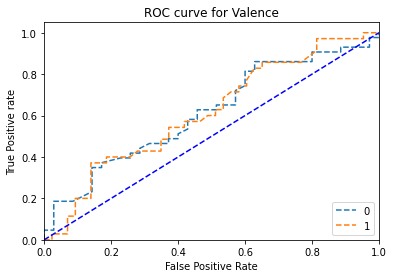

In [13]:
y_test_binarized=label_binarize(y_test_va,classes=classes_quad)
classes = classes_va
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob_va[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], linestyle='--',  label='%s' % classes[i]) 

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('ROC curve for Valence')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

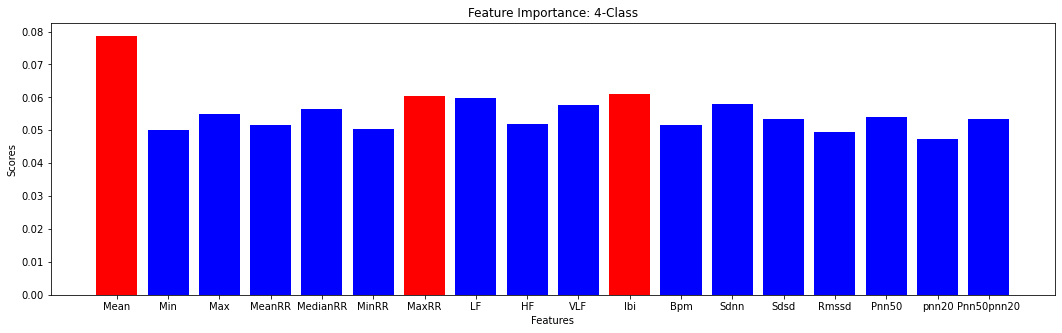

In [14]:
#Feature Importance graph plot for 4-class

plt.figure(1,figsize=(18,5))
xaxis = column_names
clrs = ['blue' if (x < 0.06) else 'red' for x in all_quad_feature ]
plt.bar(xaxis, all_quad_feature, color = clrs)
plt.title('Feature Importance: 4-Class')
plt.xlabel('Features')
plt.ylabel('Scores')
plt.show()

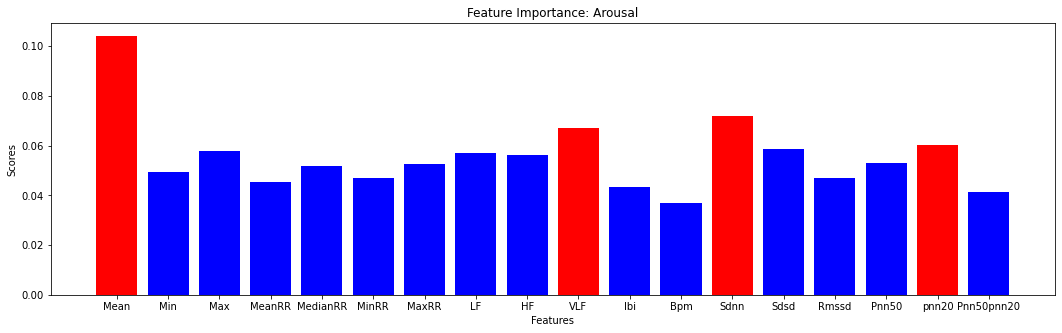

In [15]:
#Feature Importance graph plot for Arousal

plt.figure(1,figsize=(18,5))
xaxis = column_names
clrs = ['blue' if (x < 0.06) else 'red' for x in all_ar_feature ]
plt.bar(xaxis, all_ar_feature, color = clrs)
plt.title('Feature Importance: Arousal')
plt.xlabel('Features')
plt.ylabel('Scores')
plt.show()

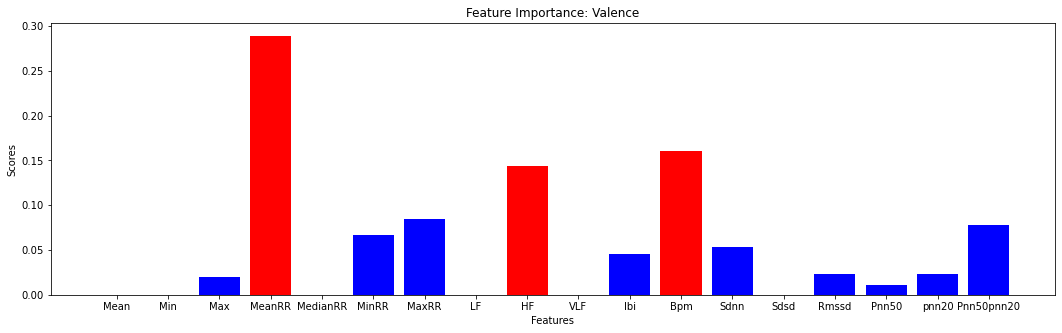

In [16]:
#Feature Importance graph plot for Valence

plt.figure(1,figsize=(18,5))
xaxis = column_names
clrs = ['blue' if (x < 0.10) else 'red' for x in all_va_feature ]
plt.bar(xaxis, all_va_feature, color = clrs)
plt.title('Feature Importance: Valence')
plt.xlabel('Features')
plt.ylabel('Scores')
plt.show()

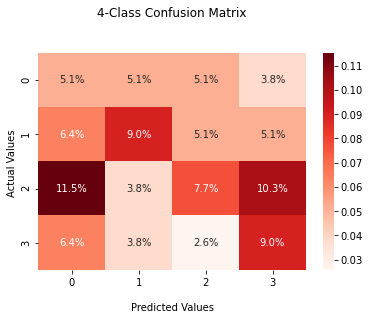

In [17]:
import seaborn as sns

#Confusion Matrix for 4-Class
ax = sns.heatmap(all_quad_cm/np.sum(all_quad_cm), annot=True, fmt='.1%', cmap='Reds')

ax.set_title('4-Class Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3'])
ax.yaxis.set_ticklabels(['0','1','2','3'])

# Display the visualization of the Confusion Matrix.
plt.show()

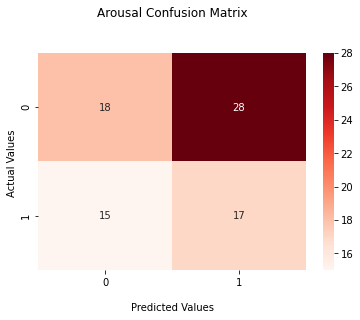

In [18]:
#Confusion Matrix for Arousal

ax = sns.heatmap(all_ar_cm, annot=True, cmap='Reds')

ax.set_title('Arousal Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

# Display the visualization of the Confusion Matrix.
plt.show()

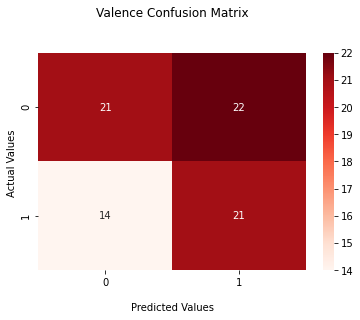

In [19]:
#Confusion Matrix for Valence

ax = sns.heatmap(all_va_cm, annot=True, cmap='Reds')

ax.set_title('Valence Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

# Display the visualization of the Confusion Matrix.
plt.show()